In [2]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('./[WFW-Group10-FOK YE]  CS 132 Finalized Dataset.csv')
df.head()

,Species,Geolocation,Year,Quarter,Value,Volume
0,All Species,National Capital Region (NCR),2020,Quarter 1,10190.23,250.84
1,All Species,Cordillera Administrative Region (CAR),2020,Quarter 1,72535.13,703.32
2,All Species,Region I (Ilocos Region),2020,Quarter 1,3062615.94,27212.01
3,All Species,Region II (Cagayan Valley),2020,Quarter 1,213501.70,2073.65
4,All Species,Region III (Central Luzon),2020,Quarter 1,9137119.99,74439.96


In [13]:
mapper = {
    ' Quarter 1': 'March 31',
    ' Quarter 2': 'June 30',
    ' Quarter 3': 'September 30',
    ' Quarter 4': 'December 31'
}
df['date'] = df['Quarter'].map(mapper)
df['ds'] = df['date'] + ' ' + df['Year'].astype(str)
df['y'] = df['Volume']
dtf = df[['ds', 'y']].copy()

In [18]:
model = Prophet(yearly_seasonality=False)
model.add_seasonality(name='quarterly', period=4, fourier_order=3)
model.fit(dtf)

10:40:12 - cmdstanpy - INFO - Chain [1] start processing
10:40:12 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=4, freq='Q')  # freq='Q' means quarterly
forecast = model.predict(future)

c:\Users\Justin Clyde\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


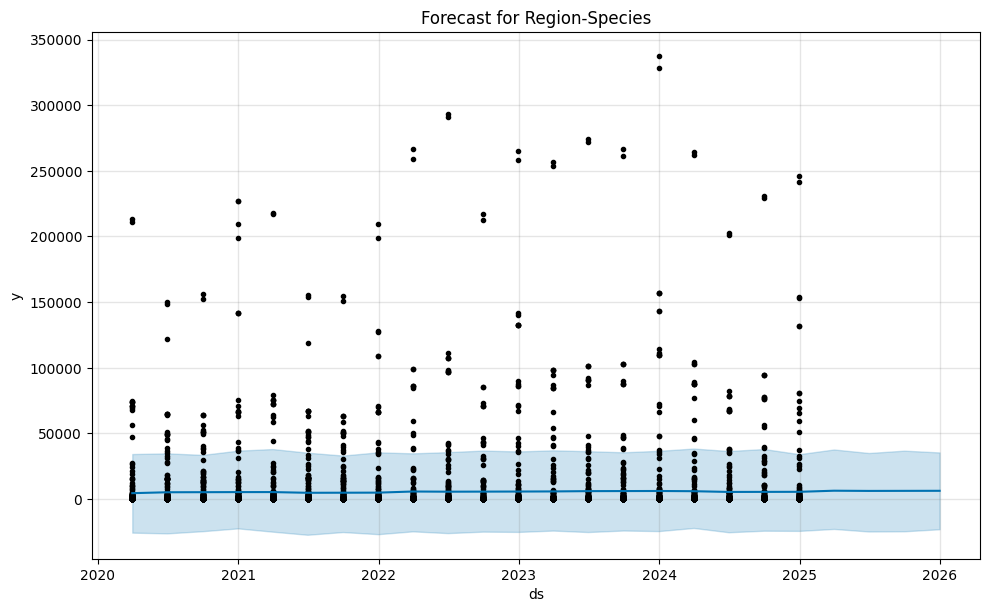

In [20]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Forecast for Region-Species")
plt.show()